<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                574 non-null    int64  
 1   sex                574 non-null    int64  
 2   chestpaintype      574 non-null    int64  
 3   restingbps         574 non-null    int64  
 4   cholesterol        574 non-null    int64  
 5   fastingbloodsugar  574 non-null    int64  
 6   restingecg         574 non-null    int64  
 7   maxheartrate       574 non-null    int64  
 8   exerciseangina     574 non-null    int64  
 9   oldpeak            574 non-null    float64
 10  STslope            574 non-null    int64  
 11  target             574 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 53.9 KB
age : [40 37 54 39 45 48 42 43 44 49 36 53 52 51 56 32 41 35 59 50 46 55 57 34
 47 38 58 61 29 62 31 28 30 33 60 65 66 63 74 68 75 69 67 64 71 70 76]
sex : [1 0]
chestpain

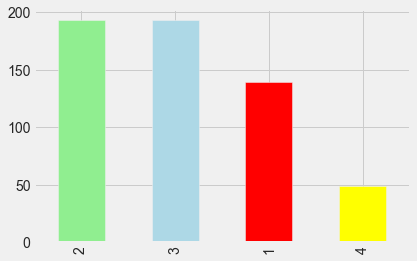

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder , LabelBinarizer, MinMaxScaler, OrdinalEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
bankdata = pd.read_csv("stressdataset4.csv")
bankdata.info()
bankdata.head()

bankdata.shape
pd.set_option("display.float", "{:.2f}".format)
bankdata.describe()
bankdata.target.value_counts()
bankdata.target.value_counts().plot(kind="bar", color=["lightgreen", "lightblue", "red", "yellow"])
bankdata.isna().sum()
categorical_val = []
continous_val = []
for column in bankdata.columns:
    print('==============================')
    print(f"{column} : {bankdata[column].unique()}")
    if len(bankdata[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)



categorical_val.remove('target')
bankdata2 = pd.get_dummies(bankdata, columns = categorical_val)
#bankdata2.head()
#print(bankdata.columns)
#print(bankdata2.columns)

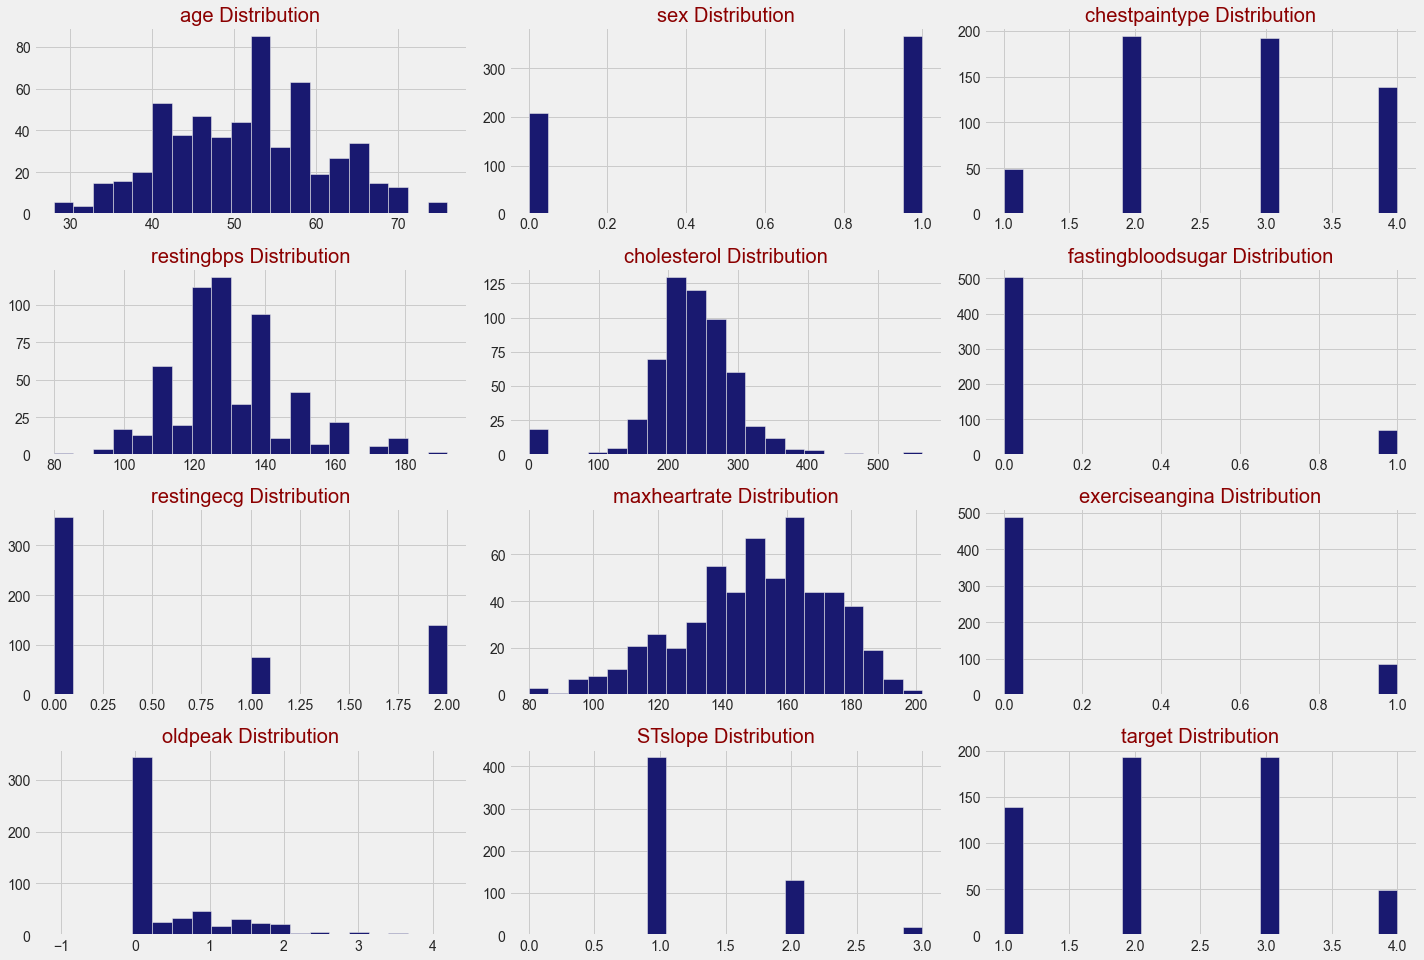

In [2]:

def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(bankdata,bankdata.columns,6,3)

In [3]:

from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'restingbps', 'cholesterol', 'maxheartrate', 'oldpeak']
bankdata2[col_to_scale] = s_sc.fit_transform(bankdata2[col_to_scale])

print("########################################################################")
print("\n")
bankdata2 = bankdata2.dropna()

x = bankdata2.drop("target", axis = 1)
y = bankdata2.target

from numpy import mean
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
cv=KFold(n_splits= 10, random_state= 1, shuffle= True)
model = DecisionTreeClassifier(max_depth= 2, random_state= 42)
scores = cross_val_score(model, x,y, scoring= 'accuracy', cv = cv , n_jobs= -1)
print('Decision Tree Accuracy: %.3f' % (mean (scores)))
print("\n")

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
y_pred = dtree_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("\n", "                              Descision Tree                             ")
print ("\n","Confusion Matrix: \n", cm , "\n")
print(classification_report(y_test, y_pred))
test_score = accuracy_score(y_test, dtree_model.predict(X_test)) * 100
train_score = accuracy_score(y_train, dtree_model.predict(X_train)) * 100
print("Training Accuracy = ",train_score, "%")
print("Testing Accuracy = ", test_score, "%")
print("\n")
print("########################################################################")
print("\n")

from numpy import mean
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
cv=KFold(n_splits= 10, random_state= 1, shuffle= True)
model = SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(model, x,y, scoring= 'accuracy', cv = cv , n_jobs= -1)
print('Linear SVM Accuracy: %.3f' % (mean (scores)))
print("\n")

svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
y_pred = svm_model_linear.predict(X_test) 
cm = confusion_matrix(y_test, y_pred)
print("\n", "                                  Linear SVM                                ")
print ("\n","Confusion Matrix: \n", cm , "\n")
print(classification_report(y_test, y_pred))
test_score = accuracy_score(y_test, svm_model_linear.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_model_linear.predict(X_train)) * 100
print("Training Accuracy = ",train_score, "%")
print("Testing Accuracy = ", test_score, "%")
print("\n")
print("########################################################################")
print("\n")

from numpy import mean
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
cv=KFold(n_splits= 10, random_state= 1, shuffle= True)
model = KNeighborsClassifier(n_neighbors = 7)
scores = cross_val_score(model, x,y, scoring= 'accuracy', cv = cv , n_jobs= -1)
print('K-Neigebors Accuracy: %.3f' % (mean (scores)))
print("\n")



knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
y_pred = knn.predict(X_test) 
cm = confusion_matrix(y_test, y_pred)

print("\n", "                                  K-Neigebors                                ")
print ("\n","Confusion Matrix: \n", cm , "\n")
print(classification_report(y_test, y_pred))
test_score = accuracy_score(y_test, knn.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn.predict(X_train)) * 100
print("Training Accuracy = ",train_score, "%")
print("Testing Accuracy = ", test_score, "%")
print("\n")
print("########################################################################")
print("\n")

from numpy import mean
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neural_network import MLPClassifier 
cv=KFold(n_splits= 10, random_state= 1, shuffle= True)
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
scores = cross_val_score(model, x,y, scoring= 'accuracy', cv = cv , n_jobs= -1)
print('Neural Network Accuracy: %.3f' % (mean (scores)))
print("\n")



NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NN.fit(X_train,y_train)
y_pred= NN.predict(X_test)
print("                                      Neural Network                                     ")
print("\n","Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

test_score = accuracy_score(y_test, NN.predict(X_test)) * 100
train_score = accuracy_score(y_train, NN.predict(X_train)) * 100
print("Training Accuracy = ",train_score, "%")
print("Testing Accuracy = ", test_score, "%")

print("\n")
print("########################################################################")
print("\n")
from numpy import mean
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
cv=KFold(n_splits= 10, random_state= 1, shuffle= True)
model = LogisticRegression(solver='liblinear')
scores = cross_val_score(model, x,y, scoring= 'accuracy', cv = cv , n_jobs= -1)
print('Logistic Regression Accuracy: %.3f' % (mean (scores)))
print("\n")


lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
y_pred=lr_clf.predict(X_test)
print("\n")
print("                                     Logistic Regression                                      ")
print("Confusion Matrix: \n" , confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100
print("Training Accuracy = ",train_score, "%")
print("Testing Accuracy = ", test_score, "%")
print("\n")
print("########################################################################")
print("\n")

from numpy import mean
from sklearn.model_selection import KFold, cross_val_score
cv=KFold(n_splits= 10, random_state= 1, shuffle= True)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, random_state=42)
scores = cross_val_score(model, x,y, scoring= 'accuracy', cv = cv , n_jobs= -1)
print('Random Forest Accuracy: %.3f' % (mean (scores)))
print("\n")

rf_clf = RandomForestClassifier(n_estimators=10, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print("\n")
print("                                      Random Forest                                       ")
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100
print("Training Accuracy = ",train_score, "%")
print("Testing Accuracy = ", test_score, "%")

print("\n")
print("########################################################################")
print("\n")








########################################################################


Decision Tree Accuracy: 0.913



                               Descision Tree                             

 Confusion Matrix: 
 [[33  0  0  0]
 [ 0 36  0  0]
 [ 0  0 36  0]
 [10  0  0  0]] 

              precision    recall  f1-score   support

           1       0.77      1.00      0.87        33
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        36
           4       0.00      0.00      0.00        10

    accuracy                           0.91       115
   macro avg       0.69      0.75      0.72       115
weighted avg       0.85      0.91      0.88       115

Training Accuracy =  91.28540305010894 %
Testing Accuracy =  91.30434782608695 %


########################################################################


Linear SVM Accuracy: 0.998



                                   Linear SVM                                

 Confusion Matrix: 
 [[33  0  

c:\users\dell\pycharmprojects\untitled10\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\pycharmprojects\untitled10\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\dell\pycharmprojects\untitled10\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r